In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
training_set = image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [4]:
validation_set = image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [6]:
INPUT_SHAPE = (224, 224, 3)

In [7]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [8]:
#mobnet.trainable = False #--used to freeze weights of this pretrained model 

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [11]:
model.add(mobnet)

In [12]:
model.add(tf.keras.layers.Dense(units = 4,activation='softmax'))

In [13]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [15]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2392/2392 [==============================] - 449s 181ms/step - loss: 1.1266 - accuracy: 0.8653 - val_loss: 0.9557 - val_accuracy: 0.8967
Epoch 2/15
2392/2392 [==============================] - 428s 179ms/step - loss: 0.8245 - accuracy: 0.8953 - val_loss: 0.7119 - val_accuracy: 0.9017
Epoch 3/15
2392/2392 [==============================] - 422s 176ms/step - loss: 0.6239 - accuracy: 0.9433 - val_loss: 0.5530 - val_accuracy: 0.9494
Epoch 4/15
2392/2392 [==============================] - 422s 176ms/step - loss: 0.4818 - accuracy: 0.9592 - val_loss: 0.4307 - val_accuracy: 0.9571
Epoch 5/15
2392/2392 [==============================] - 416s 174ms/step - loss: 0.3794 - accuracy: 0.9612 - val_loss: 0.3471 - val_accuracy: 0.9546
Epoch 6/15
2392/2392 [==============================] - 699s 292ms/step - loss: 0.3003 - accuracy: 0.9646 - val_loss: 0.2723 - val_accuracy: 0.9648
Epoch 7/15
2392/2392 [==============================] - 832s 347ms/step - loss: 0.2363 - accuracy: 0.9708 - val_

In [16]:
model.save("Trained_Model.h5")

In [17]:
model.save("Trained_Model.keras")

In [18]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [19]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'loss': [1.1266162395477295,
  0.8244674205780029,
  0.6238992214202881,
  0.48175710439682007,
  0.37944573163986206,
  0.3002587556838989,
  0.23628975450992584,
  0.1870715320110321,
  0.14916448295116425,
  0.12049394845962524,
  0.09914962947368622,
  0.08401799947023392,
  0.0726182609796524,
  0.06370051205158234,
  0.05804949626326561],
 'accuracy': [0.8653205037117004,
  0.8953015804290771,
  0.943305253982544,
  0.9592106342315674,
  0.961223304271698,
  0.964634358882904,
  0.9707900285720825,
  0.9751290678977966,
  0.9794288873672485,
  0.9822779893875122,
  0.9849441051483154,
  0.9870091080665588,
  0.9884728193283081,
  0.9896491169929504,
  0.9900673031806946],
 'val_loss': [0.9557129740715027,
  0.7118853330612183,
  0.5529876947402954,
  0.43072617053985596,
  0.3470507264137268,
  0.2723487317562103,
  0.2370094358921051,
  0.18495404720306396,
  0.16861265897750854,
  0.14195576310157776,
  0.14738720655441284,
  0.14347237348556519,
  0.12848401069641113,
  0.118

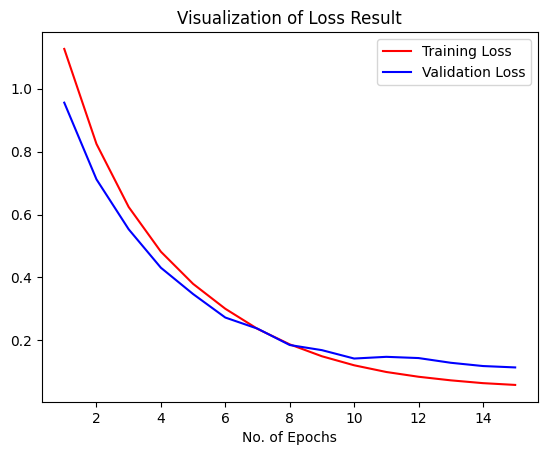

In [20]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

In [21]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [23]:
test_loss,test_acc = model.evaluate(test_set)

171/171 [==============================] - 13s 72ms/step - loss: 0.1214 - accuracy: 0.9730


In [24]:
test_loss

0.12139757722616196

In [25]:
test_acc

0.9730174541473389

## Model Evaluation

In [27]:
model = tf.keras.models.load_model("Trained_Model.h5")

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [30]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [31]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [33]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

171/171 [==============================] - 14s 72ms/step


In [34]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [35]:
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

### 1. Classification Report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3746
           1       0.96      0.96      0.96      1161
           2       0.90      0.89      0.89       887
           3       0.99      0.99      0.99      5139

    accuracy                           0.97     10933
   macro avg       0.95      0.95      0.95     10933
weighted avg       0.97      0.97      0.97     10933



### 2. Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3654,   30,   56,    6],
       [  15, 1115,    0,   31],
       [  69,    4,  785,   29],
       [   8,   12,   35, 5084]], dtype=int64)

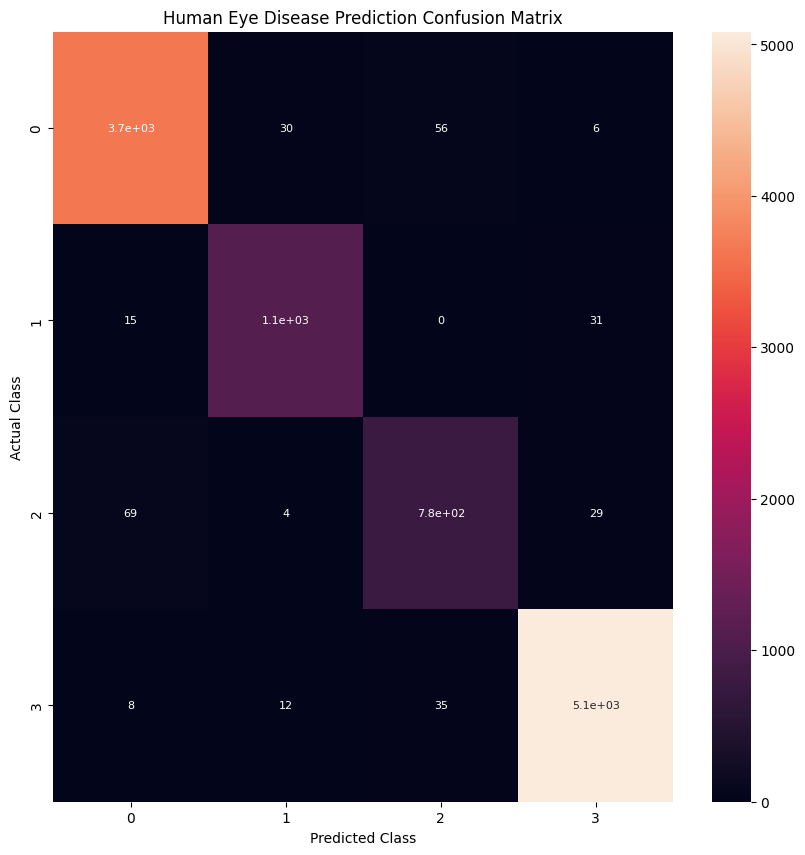

In [38]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()